Task 4, part a)
Design a high-pass FIR filter using the spesifications as given in section 7.6.2 of the tekstbook. 
Plot the following:
i. Impulse response of the filter using stem() function
ii. Magnitude response of the filter in dB
iii. Magnitude of thr Fourier transform of the Kaiser window in dB
and iv. discuss M = 24 vs. M = 25

From section 7.6.2 in the book we get certain specifications.
First of all I write equation (7.80), which is based of an ideal all-pass equation and then subtracting the low-pass filter from the all-pass and we then have only the high-pass filter left.
After plotting in the rest of the specifications, like delta1 = delta2 = 0.02, I make the first two graphs for i. and ii..

In [17]:
import numpy as np
from scipy import signal
from scipy import special as sps
import matplotlib.pyplot  as plt

delta1 = delta2 = 0.02;
delta = min(delta1,delta2);
ws = 0.35*np.pi
wp = 0.5*np.pi
wc = (ws + wp)/2;

dw = abs(ws - wp);
A = -20*np.log10(delta);
#M = np.ceil((A - 8)/(2.285*dw))
M = 24
#M = M + 1
n = np.arange(M+1)
alpha = M/2;
print(A)
print(M)
print(dw)

33.979400086720375
24
0.47123889803846897


24
25
25
2.652339138368929


C:\Users\Mina H. F\anaconda\lib\site-packages\ipykernel_launcher.py:37: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


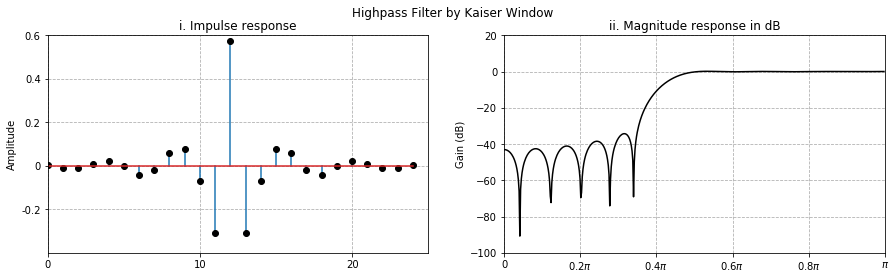

In [32]:
np.seterr(divide='ignore', invalid='ignore');
# The ideal allpass filter:
hi_ap = np.sin(np.pi*(n-alpha))/(np.pi*(n - alpha))
hi_ap[np.isnan(hi_ap)] = 1; # pi/pi = 1 is the limit when 'n - alpha' --> 0
# The ideal lowpass filter:
hi_lp = np.sin(wc*(n-alpha))/(np.pi*(n - alpha))
hi_lp[np.isnan(hi_lp)] = wc/np.pi; # wc/pi is the limit when 'n - alpha' --> 0
np.seterr(divide='warn', invalid='warn');

hi_hp = hi_ap - hi_lp

# Building the Kaiser Window:

## Input parameters for the Kaiser window from eq. (7.75) in the book:
if A > 50:
    beta = 0.1102*(A - 8.7)
elif A < 21:
    beta = 0.
else:
    beta = 0.5842*(A - 21)**(0.4) + 0.07886*(A - 21)

# Calling the modified Bessel funtions of the first kind:
Win = np.abs(np.real(sps.iv(0, beta*(1 - ((n - alpha)/alpha)**2)**(1/2))/sps.iv(0,beta)))

# Windowing the ideal filter:
h = hi_hp*Win
w, H = signal.freqz(h,1,worN=512)

print(M)
print(len(Win))
print(len(h))
print(beta)

fig1, axs = plt.subplots(1,2, sharex= False,figsize=(15,4))
fig1.suptitle('Highpass Filter by Kaiser Window')

markerline, stemlines, baseline  = axs[0].stem(h, markerfmt='ko')
markerline.set_markerfacecolor('k')
axs[0].set_ylabel('Amplitude')
axs[0].set_ylim([-0.4, 0.6])
axs[0].set_yticks([-0.2, 0, 0.2, 0.4, 0.6])
axs[0].set_yticklabels([-0.2, 0, 0.2, 0.4, 0.6])
axs[0].set_xlim([0, len(h)])
axs[0].set_xticks([0, 10, 20])
axs[0].grid(linestyle='--')
axs[0].set_title('i. Impulse response');

axs[1].plot(w,20*np.log10(abs(H)),'k')
axs[1].set_ylabel('Gain (dB)')
axs[1].set_ylim([-100, 20])
axs[1].grid(linestyle='--')
axs[1].set_xlim([0, np.pi])
axs[1].set_xticks([0, 2*np.pi/10, 4*np.pi/10, 6*np.pi/10, 8*np.pi/10, np.pi])
axs[1].set_xticklabels([0, r'$0.2\pi$', r'$0.4\pi$', r'$0.6\pi$',r'$0.8\pi$', r'$\pi$']);
axs[1].set_title('ii. Magnitude response in dB');

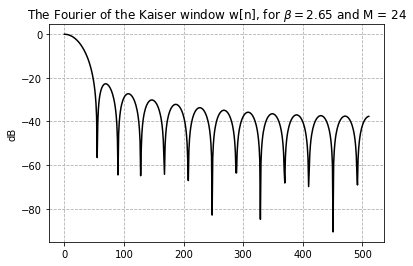

In [40]:
# iii. FFT of the Kaiser window:
w, H = signal.freqz(Win,1,worN=512)
H = H/np.max(np.abs(H))
plt.plot(20*np.log10(abs(H)),'k')
plt.grid(linestyle='--')
plt.ylabel('dB')
plt.title('The Fourier of the Kaiser window w[n], for ' + r'$\beta = $' + str(round(beta,2)) + ' and ' + 'M = ' + str(int(M)));

iii. Above we see the graph for the magnitude of the Fourier transform of the Kaiser window in dB.

iv. Discuss differences between M = 24 and M = 25.

In this example we used M = 24, and we get a good gain for our High-pass filter that don't dip down to at pi again. As section 7.6.2 explained, with an even M we get a type 1 FIR system and a precise delay. If we would have increased the M to 25 instead, making it an odd number, we would have gotten a type 2 FIR system. Even if the result of the radian frequency graf would still be closed, it is the dip at pi that blocks our highpass from performing the best.